# 🤖 Machine Learning: Customer Segmentation with K-Means Clustering
**Oleh: Wisma Jaya Laksana**

Setelah melakukan segmentasi berbasis *rules* manual (RFM Analysis), di notebook ini saya menggunakan algoritma **Unsupervised Machine Learning (K-Means)** untuk membiarkan AI menemukan sendiri pola tersembunyi dari perilaku pelanggan.

In [15]:
import pandas as pd
import numpy as np

# 1. Panggil kembali data hasil RFM yang sudah kamu simpan tadi
rfm = pd.read_csv('../data/Hasil_Analisa_RFM_Final.csv')

# 2. Cek apakah kolomnya sudah benar
print("Kolom yang tersedia:", rfm.columns)
display(rfm.head())

Kolom yang tersedia: Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score',
       'M_Score', 'RFM_Score', 'Segment_Map', 'Segment'],
      dtype='str')


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment_Map,Segment
0,12346,326,1,77183.60,1,1,5,115,11,Hibernating
1,12347,2,182,4310.00,5,5,5,555,55,Champions
2,12348,75,31,1797.24,2,3,4,234,23,At Risk
3,12349,19,73,1757.55,4,4,4,444,44,Loyal Customers
4,12350,310,17,334.40,1,2,2,122,12,Hibernating


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Ambil data RFM mentah (R, F, M saja, tanpa label segment)
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# 2. Skalakan data (Standardization)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

print("✅ Data sudah disetara-kan skalanya!")

✅ Data sudah disetara-kan skalanya!


## 1. Mencari Jumlah Segmen Optimal (Elbow Method)
Mesin tidak tahu harus membagi pelanggan menjadi berapa kelompok. Oleh karena itu, kita menggunakan **Elbow Method** (mencari nilai WCSS/Within-Cluster Sum of Squares terkecil) untuk menemukan patahan grafik (sikut) yang menandakan jumlah *cluster* paling optimal. Berdasarkan grafik, kita memilih **K = 4**.

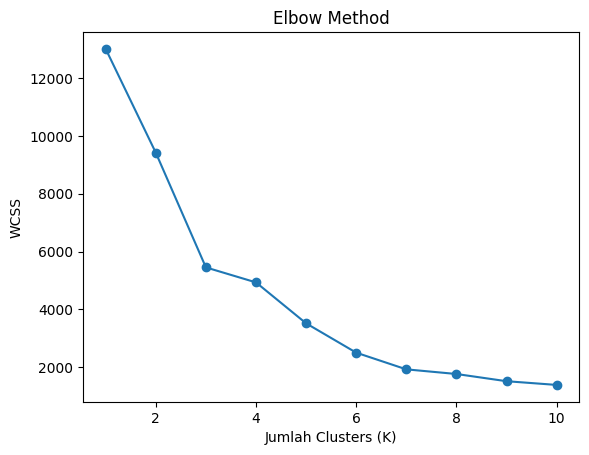

In [17]:
# Mencari nilai K (jumlah cluster) yang optimal
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [18]:
# 1. Inisialisasi K-Means dengan 4 Cluster
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

# 2. Gunakan fit_predict untuk mendapatkan LABEL (0, 1, 2, atau 3)
# Bukan fit_transform yang menghasilkan matriks jarak
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# 3. Cek hasilnya
print("✅ Pelanggan berhasil dilabeli otomatis oleh AI!")
display(rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster']].head(10))

✅ Pelanggan berhasil dilabeli otomatis oleh AI!


,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346,326,1,77183.60,3
1,12347,2,182,4310.00,0
2,12348,75,31,1797.24,1
3,12349,19,73,1757.55,0
4,12350,310,17,334.40,3
5,12352,36,85,2506.04,0
6,12353,204,4,89.00,3
7,12354,232,58,1079.40,3
8,12355,214,13,459.40,3
9,12356,23,59,2811.43,0


In [19]:
# 1. Inisialisasi K-Means dengan 4 Cluster
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

# 2. Gunakan fit_predict untuk mendapatkan LABEL (0, 1, 2, atau 3)
# Bukan fit_transform yang menghasilkan matriks jarak
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# 3. Cek hasilnya
print("✅ Pelanggan berhasil dilabeli otomatis oleh AI!")
display(rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster']].head(10))

✅ Pelanggan berhasil dilabeli otomatis oleh AI!


,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346,326,1,77183.60,3
1,12347,2,182,4310.00,0
2,12348,75,31,1797.24,1
3,12349,19,73,1757.55,0
4,12350,310,17,334.40,3
5,12352,36,85,2506.04,0
6,12353,204,4,89.00,3
7,12354,232,58,1079.40,3
8,12355,214,13,459.40,3
9,12356,23,59,2811.43,0


In [20]:
# Menghitung rata-rata R, F, M untuk setiap Cluster
cluster_analysis = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(2)

# Menghitung jumlah orang di setiap Cluster
cluster_analysis['Count'] = rfm.groupby('Cluster')['CustomerID'].count()

display(cluster_analysis)

,Recency,Frequency,Monetary,Count
Cluster,,,,
0,20.99,135.29,2645.82,2171
1,98.22,37.72,773.88,1326
2,4.69,2565.31,126118.31,13
3,272.41,25.14,605.84,828


## 2. Profiling & Visualisasi Segmen AI
Setelah mesin membagi pelanggan menjadi 4 kelompok, saya menerjemahkan angka-angka tersebut menjadi profil bisnis yang bisa ditindaklanjuti:
1. **Super VIP (Whales):** Transaksi sangat ekstrem (ribuan kali) dengan omzet ratusan ribu. Kemungkinan besar ini adalah *reseller* / *B2B Customer*.
2. **Loyal Customers:** Basis pelanggan utama yang aktif dan rutin berbelanja.
3. **At Risk:** Pelanggan yang mulai jarang berbelanja (rata-rata 3 bulan tidak kembali).
4. **Churned (Lost):** Pelanggan yang sudah hampir setahun meninggalkan toko.

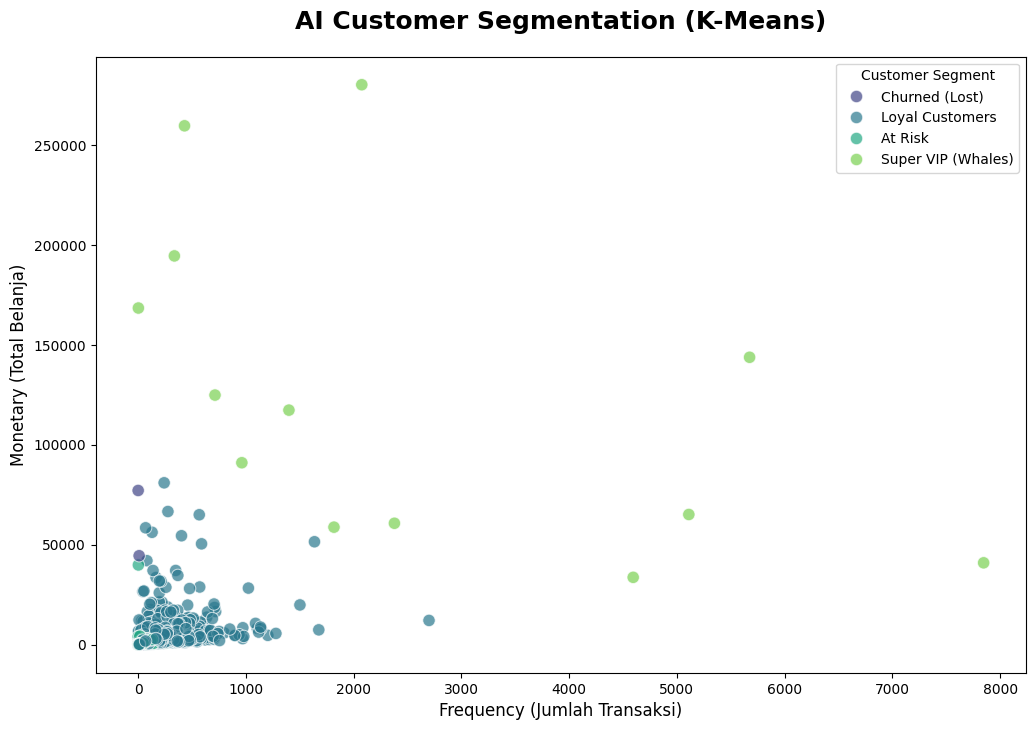

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Bikin fungsi untuk menerjemahkan angka Cluster jadi Nama Bisnis
def assign_segment_name(cluster):
    if cluster == 2:
        return 'Super VIP (Whales)'
    elif cluster == 0:
        return 'Loyal Customers'
    elif cluster == 1:
        return 'At Risk'
    else: # cluster 3
        return 'Churned (Lost)'

# 2. Terapkan fungsinya ke kolom baru
rfm['AI_Segment'] = rfm['Cluster'].apply(assign_segment_name)

# 3. Visualisasi Scatter Plot (Frequency vs Monetary)
plt.figure(figsize=(12, 8))

# Bikin titik-titik (scatter)
sns.scatterplot(
    data=rfm, 
    x='Frequency', 
    y='Monetary', 
    hue='AI_Segment', 
    palette='viridis', 
    alpha=0.7, 
    s=80
)

plt.title('AI Customer Segmentation (K-Means)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Frequency (Jumlah Transaksi)', fontsize=12)
plt.ylabel('Monetary (Total Belanja)', fontsize=12)
plt.legend(title='Customer Segment')

# Tampilkan grafiknya
plt.show()

In [22]:
# Simpan data yang sudah dilabeli AI
rfm.to_csv('../data/Hasil_Clustering_KMeans.csv', index=False)
print("✅ Data hasil Machine Learning berhasil disimpan!")

✅ Data hasil Machine Learning berhasil disimpan!
